In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
data = pd.read_csv('flights.csv')
data = data.fillna(np.nan)

In [82]:
data.head()

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
0,2015-01-02 00:00:00,AA,1.0,JFK,LAX,-19.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,381.0
1,2015-01-03 00:00:00,AA,1.0,JFK,LAX,-39.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,358.0
2,2015-01-04 00:00:00,AA,1.0,JFK,LAX,-12.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,385.0
3,2015-01-05 00:00:00,AA,1.0,JFK,LAX,-8.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,389.0
4,2015-01-06 00:00:00,AA,1.0,JFK,LAX,25.0,0.0,2475.0,0.0,0.0,0.0,25.0,0.0,424.0


In [83]:
# just a try with several functions for values
delays_list = ['carrier_delay','weather_delay','late_aircraft_delay','nas_delay','security_delay']
flight_delays_by_day = data.pivot_table(index='flight_date', values=delays_list, aggfunc={'carrier_delay':np.sum, 'weather_delay':np.sum, 'late_aircraft_delay':np.mean, 'nas_delay':np.mean, 'security_delay':np.sum})
flight_delays_by_day

,carrier_delay,late_aircraft_delay,nas_delay,security_delay,weather_delay
flight_date,,,,,
2015-01-02 00:00:00,76143.0,21.317207,9.005254,258.0,7357.0
2015-01-03 00:00:00,122652.0,26.525643,13.782660,950.0,14252.0
2015-01-04 00:00:00,142667.0,31.864547,15.452955,380.0,16784.0
2015-01-05 00:00:00,101335.0,26.294995,14.294107,197.0,20438.0
2015-01-06 00:00:00,92383.0,28.462557,17.223935,372.0,26299.0
2015-01-07 00:00:00,66708.0,22.112744,14.835132,165.0,17763.0
2015-01-08 00:00:00,74861.0,26.855823,18.485873,510.0,33015.0
2015-01-09 00:00:00,80123.0,26.280862,11.877020,182.0,15076.0
2015-01-10 00:00:00,50056.0,17.287712,6.972028,116.0,5683.0


In [84]:
data['delayed'] = data['arr_delay'].apply(lambda x: x > 0) #from previous lesson
data.head()

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time,delayed
0,2015-01-02 00:00:00,AA,1.0,JFK,LAX,-19.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,381.0,False
1,2015-01-03 00:00:00,AA,1.0,JFK,LAX,-39.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,358.0,False
2,2015-01-04 00:00:00,AA,1.0,JFK,LAX,-12.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,385.0,False
3,2015-01-05 00:00:00,AA,1.0,JFK,LAX,-8.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,389.0,False
4,2015-01-06 00:00:00,AA,1.0,JFK,LAX,25.0,0.0,2475.0,0.0,0.0,0.0,25.0,0.0,424.0,True


In [85]:
delayed_flights = data[data['delayed'] == True] #filter to only rows where delayer == True
delayed_flights['unique_carrier'].value_counts() #count the number of rows for each carrier

WN    21150
EV    11371
OO    10804
AA     9841
DL     9803
UA     8624
MQ     8060
US     6353
B6     4401
NK     2133
AS     2104
F9     1848
HA     1354
VX      781
Name: unique_carrier, dtype: int64

In [86]:
data.groupby(['unique_carrier','delayed']).size().unstack()

delayed,False,True
unique_carrier,,
AA,8912,9841
AS,3527,2104
B6,4832,4401
DL,17719,9803
EV,10596,11371
F9,1103,1848
HA,1351,1354
MQ,4692,8060
NK,1550,2133


In [87]:
delayed_by_carrier = data.groupby(['unique_carrier','delayed']).size().unstack().reset_index()
delayed_by_carrier[:5]

delayed,unique_carrier,False,True
0,AA,8912,9841
1,AS,3527,2104
2,B6,4832,4401
3,DL,17719,9803
4,EV,10596,11371


In [88]:
delayed_by_carrier['flights_count'] = (delayed_by_carrier[False] + delayed_by_carrier[True])
delayed_by_carrier[:5]

delayed,unique_carrier,False,True,flights_count
0,AA,8912,9841,18753
1,AS,3527,2104,5631
2,B6,4832,4401,9233
3,DL,17719,9803,27522
4,EV,10596,11371,21967


In [89]:
delayed_by_carrier['proportion_delayed'] = delayed_by_carrier[True] / delayed_by_carrier['flights_count']
delayed_by_carrier[:4]

delayed,unique_carrier,False,True,flights_count,proportion_delayed
0,AA,8912,9841,18753,0.524769
1,AS,3527,2104,5631,0.373646
2,B6,4832,4401,9233,0.476660
3,DL,17719,9803,27522,0.356188


In [90]:
delayed_by_carrier.sort_values('proportion_delayed', ascending=False)

delayed,unique_carrier,False,True,flights_count,proportion_delayed
7,MQ,4692,8060,12752,0.632058
5,F9,1103,1848,2951,0.626228
8,NK,1550,2133,3683,0.579147
0,AA,8912,9841,18753,0.524769
10,UA,7885,8624,16509,0.522382
9,OO,9977,10804,20781,0.519898
4,EV,10596,11371,21967,0.517640
6,HA,1351,1354,2705,0.500555
13,WN,21789,21150,42939,0.492559
2,B6,4832,4401,9233,0.476660


In [91]:
data.pivot_table(index='unique_carrier', values='arr_delay').sort_values(by='arr_delay', ascending=False)

,arr_delay
unique_carrier,
MQ,35.627406
F9,28.836953
NK,22.779670
OO,19.031663
EV,18.358520
UA,16.094772
AA,15.616299
B6,13.576129
WN,11.273536


In [92]:
southwest = data[data['unique_carrier'] == 'WN']['arr_delay']

In [93]:
southwest.describe()

count    42020.000000
mean        11.273536
std         36.438970
min        -55.000000
25%         -9.000000
50%          1.000000
75%         19.000000
max        535.000000
Name: arr_delay, dtype: float64

In [94]:
data[data['origin'] == 'ORD']['arr_delay'].describe()

count    9207.000000
mean       38.073205
std        63.261760
min       -49.000000
25%        -3.000000
50%        17.000000
75%        57.000000
max       751.000000
Name: arr_delay, dtype: float64

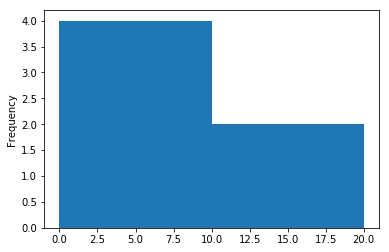

In [95]:
pd.Series([1, 2, 5, 9, 12, 20]).plot(kind='hist', bins=[0,10,20]) # `bins` defines the start and end points of bins

In [96]:
bin_values = np.arange(start=-50, stop=200, step=10)
print(bin_values)

[-50 -40 -30 -20 -10   0  10  20  30  40  50  60  70  80  90 100 110 120
 130 140 150 160 170 180 190]


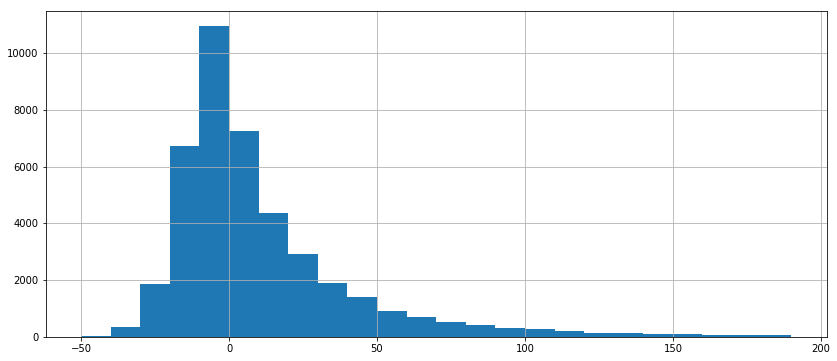

In [97]:
wn_carrier = data[data['unique_carrier'] == 'WN']
wn_carrier['arr_delay'].hist(bins=bin_values, figsize=[14,6])

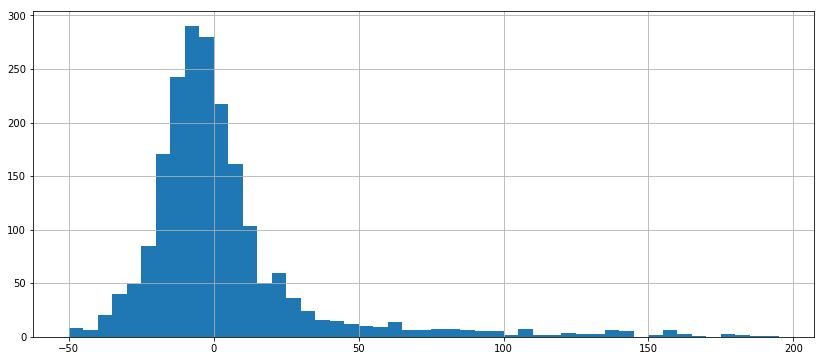

In [98]:
virgin_bin_values = np.arange(start=-50, stop=200, step=5)
virgin_carrier = data[data['unique_carrier'] == 'VX']
virgin_carrier['arr_delay'].hist(bins=virgin_bin_values, figsize=[14,6])

In [99]:
virgin_carrier.head()

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time,delayed
59564,2015-01-02 00:00:00,VX,969.0,SAN,SFO,-20.0,0.0,447.0,NaN,NaN,NaN,NaN,NaN,86.0,False
59565,2015-01-02 00:00:00,VX,97.0,IAD,LAX,6.0,0.0,2288.0,NaN,NaN,NaN,NaN,NaN,350.0,True
59997,2015-01-14 00:00:00,VX,720.0,SFO,DAL,3.0,0.0,1476.0,NaN,NaN,NaN,NaN,NaN,209.0,True
59998,2015-01-14 00:00:00,VX,730.0,DAL,DCA,1.0,0.0,1184.0,NaN,NaN,NaN,NaN,NaN,160.0,True
59999,2015-01-14 00:00:00,VX,731.0,DCA,DAL,14.0,0.0,1184.0,NaN,NaN,NaN,NaN,NaN,230.0,True


In [100]:
filter_criterion = (virgin_carrier['arr_delay'] > 20) & (virgin_carrier['arr_delay'] < 25)
virgin_late_20 = virgin_carrier[filter_criterion]
print(virgin_late_20['origin'].shape)
print(virgin_late_20['origin'].value_counts())

(48,)
SFO    13
LAX    12
EWR     4
JFK     4
DAL     4
IAD     3
FLL     2
ORD     2
BOS     1
LGA     1
LAS     1
DCA     1
Name: origin, dtype: int64


In [101]:
filter_criterion = (virgin_carrier['arr_delay'] > 15) & (virgin_carrier['arr_delay'] < 20)
virgin_late_30 = virgin_carrier[filter_criterion]
print(virgin_late_30['origin'].shape)
print(virgin_late_30['origin'].value_counts())

(43,)
LAX    15
SFO    12
JFK     4
BOS     3
DAL     3
LGA     2
EWR     1
SAN     1
DCA     1
ORD     1
Name: origin, dtype: int64


unique_carrier
MQ    Axes(0.125,0.125;0.775x0.755)
US    Axes(0.125,0.125;0.775x0.755)
Name: arr_delay, dtype: object

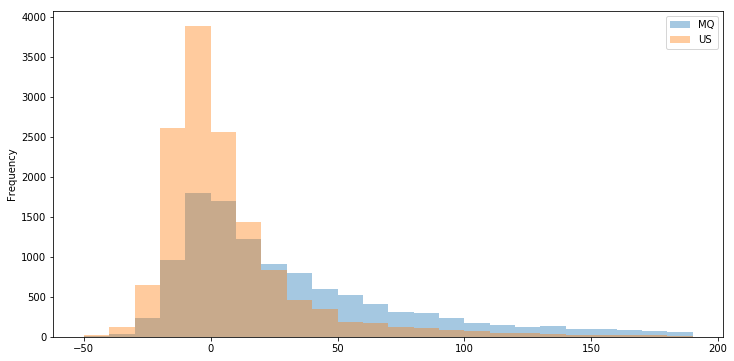

In [102]:
bin_values = np.arange(start=-50, stop=200, step=10)
us_mq_airlines_index = data['unique_carrier'].isin(['US','MQ']) # create index of flights from those airlines
us_mq_airlines = data[us_mq_airlines_index] # select rows
group_carriers = us_mq_airlines.groupby('unique_carrier')['arr_delay'] # group values by carrier, select minutes delayed
group_carriers.plot(kind='hist', bins=bin_values, figsize=[12,6], alpha=.4, legend=True) # alpha for transparency

In [103]:
group_carriers_describe = group_carriers.describe()
group_carriers_describe

,count,mean,std,min,25%,50%,75%,max
unique_carrier,,,,,,,,
MQ,11275.0,35.627406,58.444090,-51.0,-2.0,17.0,53.0,788.0
US,13972.0,7.671557,34.672795,-59.0,-10.0,-1.0,13.0,621.0


In [104]:
group_carriers_describe.get_value('MQ', 'std')

58.444090396635517

In [105]:
print('Envoy Air', group_carriers_describe.get_value('MQ', 'std'), 'minutes from the mean', group_carriers_describe.get_value('MQ', 'mean'))
print('US Airways', group_carriers_describe.get_value('US', 'std'), 'minutes from the mean', group_carriers_describe.get_value('US', 'mean'))

Envoy Air 58.4440903966 minutes from the mean 35.627405765
US Airways 34.6727946615 minutes from the mean 7.67155740052


In [106]:
hi_volume = data['origin'].value_counts()[:20]
hi_volume

ATL    12678
ORD    10046
DFW     9854
DEN     7441
LAX     7434
IAH     5762
PHX     5610
SFO     5551
LAS     4902
MCO     4318
LGA     4075
DTW     4048
CLT     3959
MSP     3789
EWR     3754
SLC     3740
BOS     3738
SEA     3639
JFK     3609
FLL     3052
Name: origin, dtype: int64

In [107]:
hi_volume_airports_names = hi_volume.index.tolist()
print(hi_volume_airports_names)

['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'IAH', 'PHX', 'SFO', 'LAS', 'MCO', 'LGA', 'DTW', 'CLT', 'MSP', 'EWR', 'SLC', 'BOS', 'SEA', 'JFK', 'FLL']


In [108]:
hi_volume_airports = data[data['origin'].isin(hi_volume_airports_names)]
hi_volume_airports.head()

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time,delayed
0,2015-01-02 00:00:00,AA,1.0,JFK,LAX,-19.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,381.0,False
1,2015-01-03 00:00:00,AA,1.0,JFK,LAX,-39.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,358.0,False
2,2015-01-04 00:00:00,AA,1.0,JFK,LAX,-12.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,385.0,False
3,2015-01-05 00:00:00,AA,1.0,JFK,LAX,-8.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,389.0,False
4,2015-01-06 00:00:00,AA,1.0,JFK,LAX,25.0,0.0,2475.0,0.0,0.0,0.0,25.0,0.0,424.0,True


In [109]:
hi_volume_airports_pivots = hi_volume_airports.pivot_table(index='flight_date', columns='origin', values='arr_delay')
hi_volume_airports_pivots

origin,ATL,BOS,CLT,DEN,DFW,DTW,EWR,FLL,IAH,JFK,LAS,LAX,LGA,MCO,MSP,ORD,PHX,SEA,SFO,SLC
flight_date,,,,,,,,,,,,,,,,,,,,
2015-01-02 00:00:00,3.327536,3.590580,0.509317,20.526899,36.049598,-6.842809,8.316993,-0.543307,12.156187,3.688742,13.709512,16.500000,-2.947712,5.834734,1.193333,4.590062,16.547325,12.254717,8.371429,4.534161
2015-01-03 00:00:00,15.428112,30.471616,13.768340,51.186292,37.604138,22.738007,37.370229,15.666667,39.844037,31.882979,18.550685,26.117338,15.606426,17.511364,20.027586,37.995702,19.783843,13.771812,11.773364,13.465190
2015-01-04 00:00:00,21.423343,26.867857,23.325077,52.495238,38.360104,35.771626,53.617978,25.293651,20.464286,55.445578,19.564767,28.159016,32.450704,39.847025,19.461279,83.225619,20.180085,10.291262,19.251092,15.503125
2015-01-05 00:00:00,3.095000,11.208609,6.051672,29.899200,28.705263,24.696594,22.674051,13.711864,8.450505,19.554422,17.229381,15.788618,34.984177,14.929204,23.874564,63.916667,13.665217,5.418060,13.225806,2.003356
2015-01-06 00:00:00,6.361725,43.310580,13.294964,15.344029,11.534626,35.078616,43.104530,23.425926,3.622642,43.359073,13.330579,7.234004,61.165049,29.996785,9.435088,42.356183,12.156658,4.372180,8.582716,0.581481
2015-01-07 00:00:00,0.944276,10.651316,4.869565,33.301095,10.428762,13.403727,22.030508,11.254464,10.490476,15.536680,7.498652,5.442446,46.063973,8.977918,-1.666667,38.479361,7.348028,9.467925,5.289216,2.977941
2015-01-08 00:00:00,3.033099,6.807692,10.484568,14.569873,11.217450,20.593060,15.419463,2.558442,1.571121,2.749091,8.597911,6.171329,3.575221,9.152648,47.264605,96.695578,8.000000,8.738351,5.141487,12.619718
2015-01-09 00:00:00,1.833499,21.045603,5.742331,21.551237,8.591810,34.665653,22.632107,1.808696,7.611354,43.294964,4.487245,8.144112,42.325581,8.758410,6.834459,46.355837,2.160550,7.464029,9.425178,3.878893
2015-01-10 00:00:00,-5.473046,3.763547,-1.658915,2.822014,5.501582,2.584906,0.422680,-5.172269,0.937888,1.259259,2.564706,2.709746,-11.311475,0.273273,8.542857,16.635209,2.213483,-2.761506,0.621622,2.718894


In [110]:
hi_volume_airports_pivots.describe()

origin,ATL,BOS,CLT,DEN,DFW,DTW,EWR,FLL,IAH,JFK,LAS,LAX,LGA,MCO,MSP,ORD,PHX,SEA,SFO,SLC
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,7.049522,11.609776,7.350537,22.283364,18.216483,16.044343,17.213870,6.938287,11.216083,14.613638,11.723369,11.302481,17.699715,11.925022,9.627240,39.274123,9.223535,6.526833,11.517644,5.083884
std,12.798122,15.004838,7.499172,16.171575,12.854437,15.286101,18.718574,10.452380,11.488504,22.619487,11.574100,10.193057,23.428830,12.647029,14.971524,28.195169,7.051518,4.795902,8.742399,5.910367
min,-5.473046,-9.384106,-1.681250,-0.638838,2.690160,-6.842809,-5.456446,-7.118721,-0.530120,-14.911877,-3.695418,-2.958559,-11.311475,-2.242991,-7.691030,2.735369,-1.161593,-2.761506,0.621622,-5.717949
25%,0.944276,3.590580,0.509317,14.569873,8.591810,2.584906,0.422680,-0.543307,1.571121,1.259259,4.487245,5.442446,-0.883234,1.885350,1.193333,22.578704,2.213483,4.372180,5.289216,2.003356
50%,3.033099,8.254777,5.789286,20.526899,11.534626,20.593060,15.419463,3.360360,8.450505,4.297101,12.710526,8.144112,15.606426,8.977918,6.834459,37.995702,8.000000,7.318519,9.425178,3.878893
75%,6.361725,21.045603,13.294964,29.899200,28.705263,24.696594,22.674051,13.711864,17.064904,31.882979,17.229381,16.500000,34.984177,17.511364,19.461279,46.355837,13.665217,9.467925,13.225806,7.051546
max,42.375375,43.310580,23.325077,52.495238,38.360104,35.771626,53.617978,25.293651,39.844037,55.445578,40.793103,28.159016,61.165049,39.847025,47.264605,96.695578,20.180085,13.771812,27.918719,15.503125


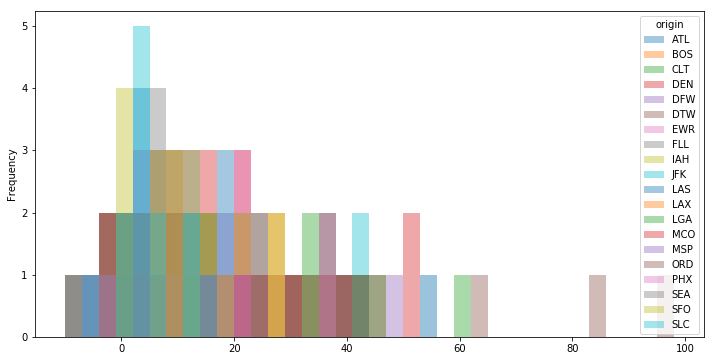

In [111]:
airport_bins = np.arange(-10,100,3)
hi_volume_airports_pivots.plot(kind='hist', bins=airport_bins, figsize=[12,6], alpha=.4, legend=True)

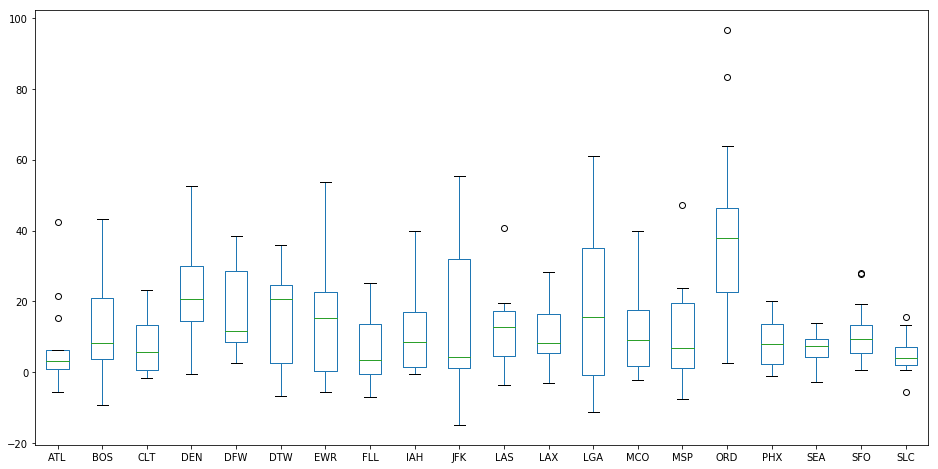

In [112]:
hi_volume_airports_pivots = hi_volume_airports.pivot_table(index='flight_date', columns='origin', values='arr_delay')
hi_volume_airports_pivots.plot(kind='box', figsize=[16,8])

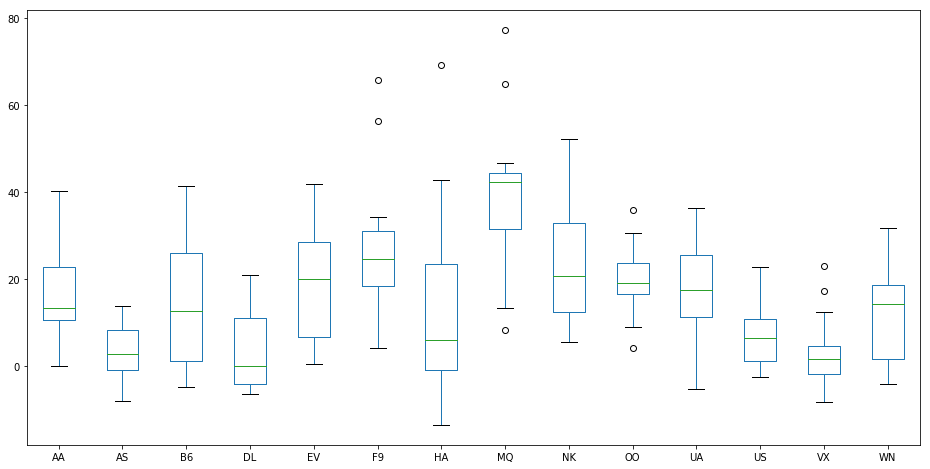

In [113]:
hi_volume_airports_pivots = hi_volume_airports.pivot_table(index='flight_date', columns='unique_carrier', values='arr_delay')
hi_volume_airports_pivots.plot(kind='box', figsize=[16,8])